# Using 5.2 - with one set of params

# Ackley

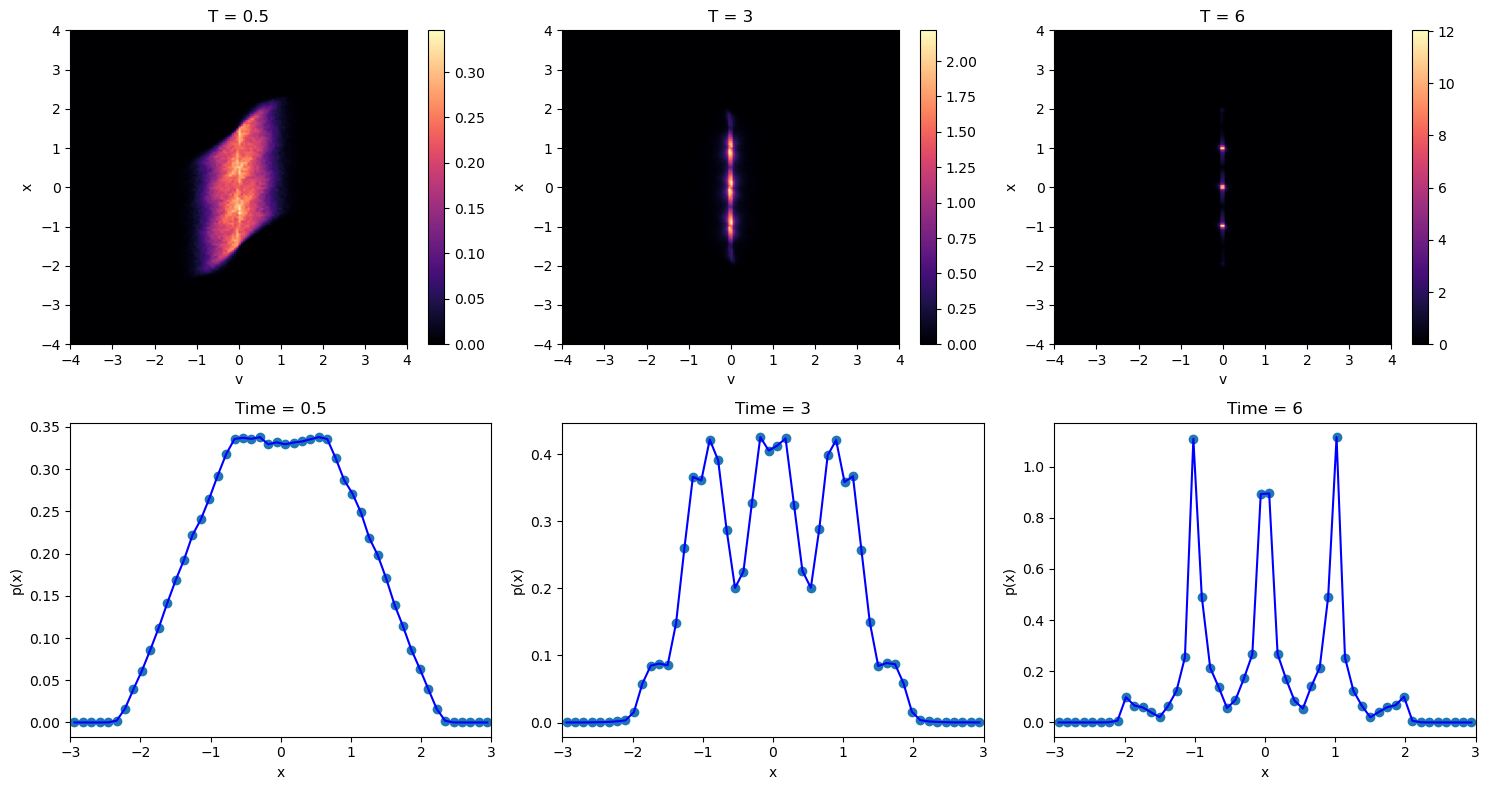

In [1]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np



# Define the Ackley function
def F1(X):
    trm1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(X**2, axis=0) / d))
    trm2 = -np.exp(np.sum(np.cos(2 * np.pi * X), axis=0) / d)
    return trm1 + trm2 + 20 + np.e


def F(X):
    return 10 * X.shape[0] + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)


# Parameters
Vmax = 4
Xmax = 3
Xmin = -3
d = 1
Number_particles = 500000
mean = 0
std_dev = 4
T = 10

dt = 0.1
alpha = 30
sigma1 = 1/np.sqrt(3)
sigma2 = 0
lambd1 = 1
lambd2 = 0
gamma = 0.5
m = 1 - gamma
v = 0.5
beta = 30

X = np.random.uniform(Xmin, Xmax, (d, Number_particles))*0.5
V = np.random.uniform(-Vmax, Vmax, (d, Number_particles)) *0.5

Y = X.copy()


time_points = [0.5 , 3, 6]
positions_at_time_points = []
histograms = []


def S(X, Y):
    return 1 + np.sign(F(Y) - F(X))


# Main loop
for current_it in np.arange(0, T, dt):
    
    
    drift1 = ((lambd1 * dt) / (m + gamma * dt)) * (Y - X)

    diff1 = ((sigma1 * np.sqrt(dt)) / (m + gamma * dt)) * ((Y - X) * np.random.randn(1,Number_particles))

    V = (m / (m + gamma * dt)) * V + drift1 + diff1

    X = X +  dt*V

    #(S(X, Y)**beta)
    Y = Y + v * dt * (X - Y) * S(X, Y)

    
    if current_it in time_points:
        hist, xedges, yedges = np.histogram2d(V[0], X[0], bins=[150, 150 ], range=[[-4, 4], [-4, 4]], density=True)
        histograms.append((hist, xedges, yedges))
        positions_at_time_points.append(X.copy())

        

# histograms and PDFs
fig, axs = plt.subplots(2, len(time_points), figsize=(15, 8))

# Plot histograms 
for i in range(len(time_points)):
    hist, xedges, yedges = histograms[i]
    im = axs[0, i].imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                          origin='lower', cmap='magma', aspect='auto')
    axs[0, i].set_title(f'T = {time_points[i]}')
    axs[0, i].set_xlabel('v')
    axs[0, i].set_ylabel('x')
    fig.colorbar(im, ax=axs[0, i])

# Plot PDFs 
for i in range(len(time_points)):
    positions = positions_at_time_points[i]
    density, bins = np.histogram(positions[0], bins=50, range=(Xmin, Xmax), density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axs[1, i].scatter(bin_centers, density)
    axs[1, i].plot(bin_centers, density, color='b')
    axs[1, i].set_title(f'Time = {time_points[i]}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('p(x)')
    axs[1, i].set_xlim([Xmin, Xmax])

plt.tight_layout()
plt.show()



# Rastrigin

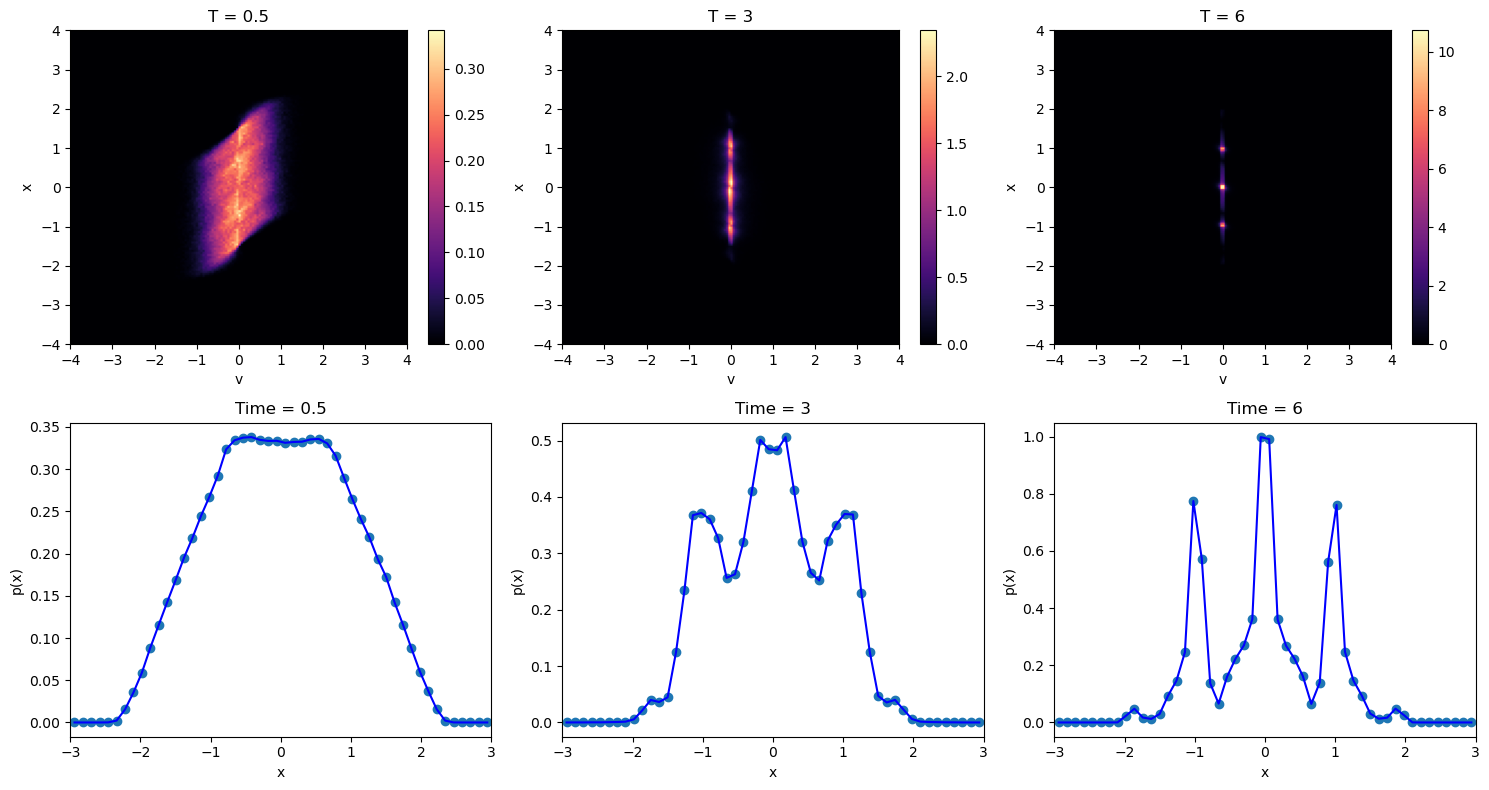

In [2]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np


# Define the Ackley function
def F(X):
    trm1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(X**2, axis=0) / d))
    trm2 = -np.exp(np.sum(np.cos(2 * np.pi * X), axis=0) / d)
    return trm1 + trm2 + 20 + np.e


def F1(X):
    return 10 * X.shape[0] + np.sum(X**2 - 10 * np.cos(2 * np.pi * X), axis=0)


# Parameters
Vmax = 4
Xmax = 3
Xmin = -3
d = 1
Number_particles = 500000
mean = 0
std_dev = 4
T = 10

dt = 0.1
alpha = 30
sigma1 = 1/np.sqrt(3)
sigma2 = 0
lambd1 = 1
lambd2 = 0
gamma = 0.5
m = 1 - gamma
v = 0.5
beta = 30

X = np.random.uniform(Xmin, Xmax, (d, Number_particles))*0.5
V = np.random.uniform(-Vmax, Vmax, (d, Number_particles)) *0.5

Y = X.copy()


time_points = [0.5 , 3, 6]
positions_at_time_points = []
histograms = []


def S(X, Y):
    return 1 + np.sign(F(Y) - F(X))


# Main loop
for current_it in np.arange(0, T, dt):
    
    
    drift1 = ((lambd1 * dt) / (m + gamma * dt)) * (Y - X)

    diff1 = ((sigma1 * np.sqrt(dt)) / (m + gamma * dt)) * ((Y - X) * np.random.randn(1,Number_particles))

    V = (m / (m + gamma * dt)) * V + drift1 + diff1

    X = X +  dt*V

    #(S(X, Y)**beta)
    Y = Y + v * dt * (X - Y) * S(X, Y)

    
    if current_it in time_points:
        hist, xedges, yedges = np.histogram2d(V[0], X[0], bins=[150, 150 ], range=[[-4, 4], [-4, 4]], density=True)
        histograms.append((hist, xedges, yedges))
        positions_at_time_points.append(X.copy())

        

# histograms and PDFs
fig, axs = plt.subplots(2, len(time_points), figsize=(15, 8))

# Plot histograms 
for i in range(len(time_points)):
    hist, xedges, yedges = histograms[i]
    im = axs[0, i].imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                          origin='lower', cmap='magma', aspect='auto')
    axs[0, i].set_title(f'T = {time_points[i]}')
    axs[0, i].set_xlabel('v')
    axs[0, i].set_ylabel('x')
    fig.colorbar(im, ax=axs[0, i])

# Plot PDFs 
for i in range(len(time_points)):
    positions = positions_at_time_points[i]
    density, bins = np.histogram(positions[0], bins=50, range=(Xmin, Xmax), density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    axs[1, i].scatter(bin_centers, density)
    axs[1, i].plot(bin_centers, density, color='b')
    axs[1, i].set_title(f'Time = {time_points[i]}')
    axs[1, i].set_xlabel('x')
    axs[1, i].set_ylabel('p(x)')
    axs[1, i].set_xlim([Xmin, Xmax])

plt.tight_layout()
plt.show()



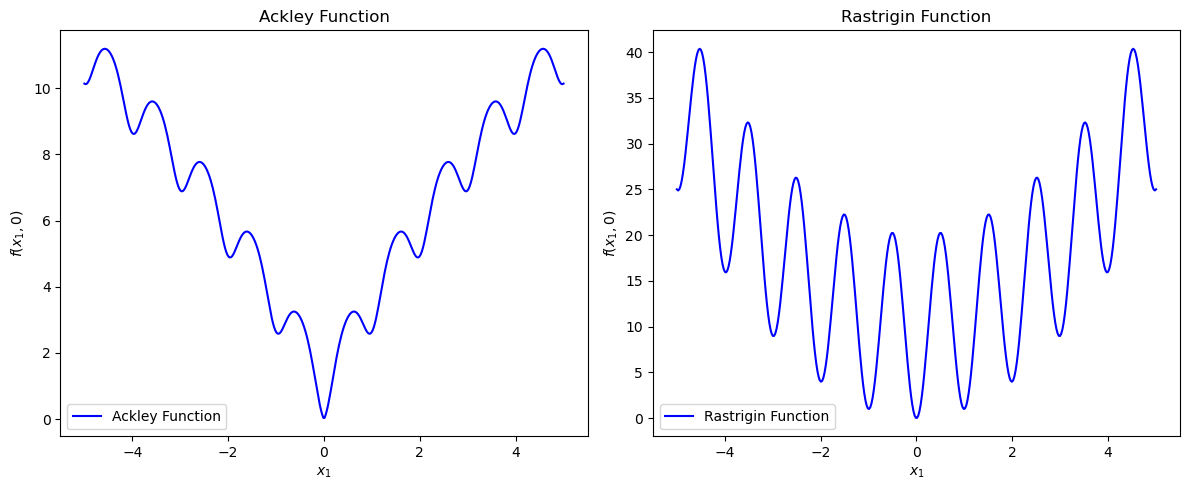

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ackley_function(x1, x2):
    part1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2)))
    part2 = -np.exp(0.5 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2)))
    return part1 + part2 + 20 + np.e

# Define the range of x1 values
x1 = np.linspace(-5, 5, 400)
x2 = 0  # Fix x2

# Compute Ackley function values
ackley_values = ackley_function(x1, x2)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x1, ackley_values, label='Ackley Function', color='blue')
plt.title('Ackley Function')
plt.xlabel('$x_1$')
plt.ylabel('$f(x_1, 0)$')
plt.legend()


def rastrigin_function(x1, x2):
    A = 10
    return A * 2 + (x1**2 - A * np.cos(2 * np.pi * x1)) + (x2**2 - A * np.cos(2 * np.pi * x2))

# Compute Rastrigin function values
rastrigin_values = rastrigin_function(x1, x2)

# Plotting
plt.subplot(1, 2, 2)
plt.plot(x1, rastrigin_values, label='Rastrigin Function', color='blue')
plt.title('Rastrigin Function')
plt.xlabel('$x_1$')
plt.ylabel('$f(x_1, 0)$')

plt.legend()

plt.tight_layout()
plt.show()
